**Lab Assignment : 06 <br>ID : 2215151024**

**This is the assignment that was given to me :**  <br>   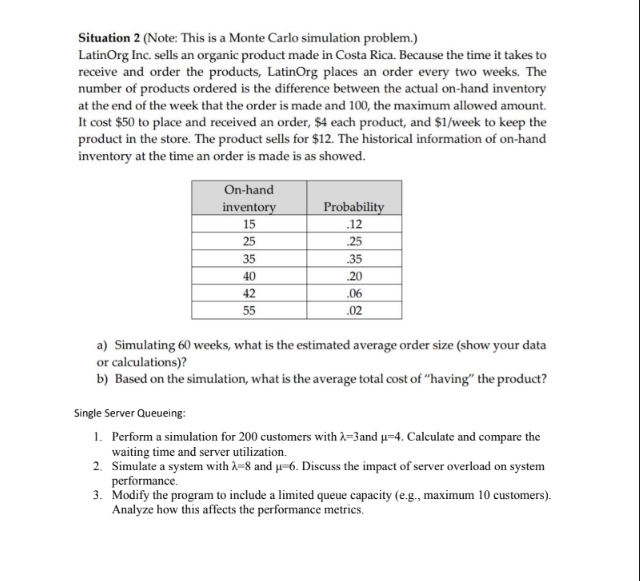

In [9]:
import numpy as np

np.random.seed(42)

inventory_levels = np.array([15, 25, 35, 40, 42, 55])
probabilities = np.array([0.12, 0.25, 0.35, 0.20, 0.06, 0.02])

weeks = 60
order_every = 2
orders = weeks // order_every

simulated_inventory = np.random.choice(inventory_levels, size=orders, p=probabilities)

order_sizes = 100 - simulated_inventory
avg_order_size = np.mean(order_sizes)
print(f"Simulated On-hand Inventories (every 2 weeks):\n{simulated_inventory}")
print(f"Order Sizes: {order_sizes}")
print(f"Estimated Average Order Size over {weeks} weeks: {avg_order_size:.2f}")


Simulated On-hand Inventories (every 2 weeks):
[35 42 40 35 25 25 15 40 35 35 15 42 40 25 25 25 25 35 35 25 35 25 25 25
 35 40 25 35 35 15]
Order Sizes: [65 58 60 65 75 75 85 60 65 65 85 58 60 75 75 75 75 65 65 75 65 75 75 75
 65 60 75 65 65 85]
Estimated Average Order Size over 60 weeks: 69.53


In [11]:
order_cost = 50
unit_cost = 4
holding_cost_per_week = 1

total_costs = []
for inventory, order_size in zip(simulated_inventory, order_sizes):
    product_cost = order_size * unit_cost
    holding_cost = inventory * holding_cost_per_week * order_every
    total_cost = order_cost + product_cost + holding_cost
    total_costs.append(total_cost)

average_total_cost = np.mean(total_costs)
print(f"Average Total Cost of 'Having' the Product {orders} orders: ${average_total_cost:.2f}")

Average Total Cost of 'Having' the Product 30 orders: $389.07


Problem 1:
Server Utilization: 79.73%
Average Waiting Time: 0.59 units
Average Queue Length: 0.81 customers


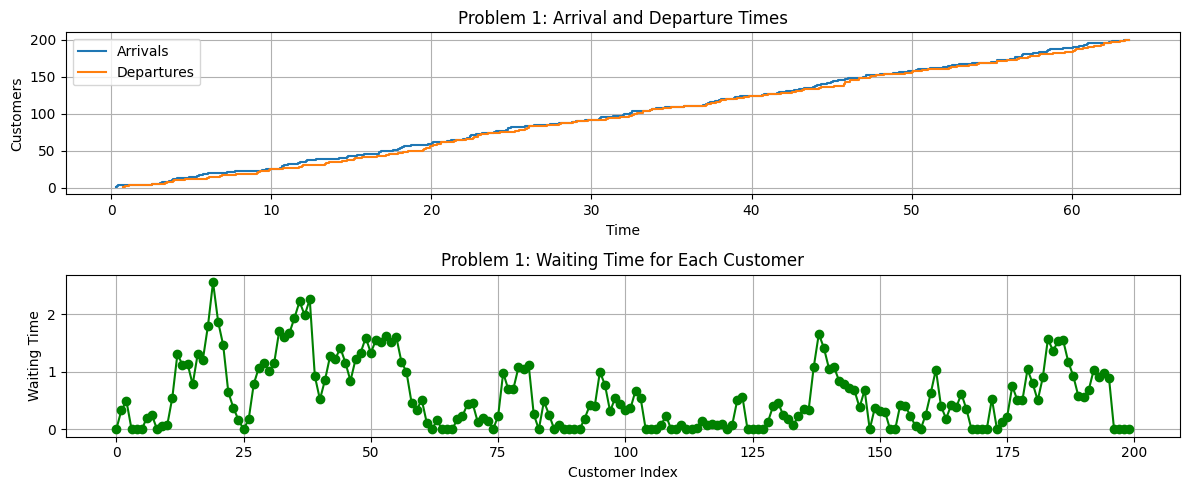

In [12]:
import numpy as np
import matplotlib.pyplot as plt

lambda_rate = 3
mu_rate = 4
n_customers = 200

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 1:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

Problem 2:
Server Utilization: 93.06%
Average Waiting Time: 1.66 units
Average Queue Length: 0.93 customers


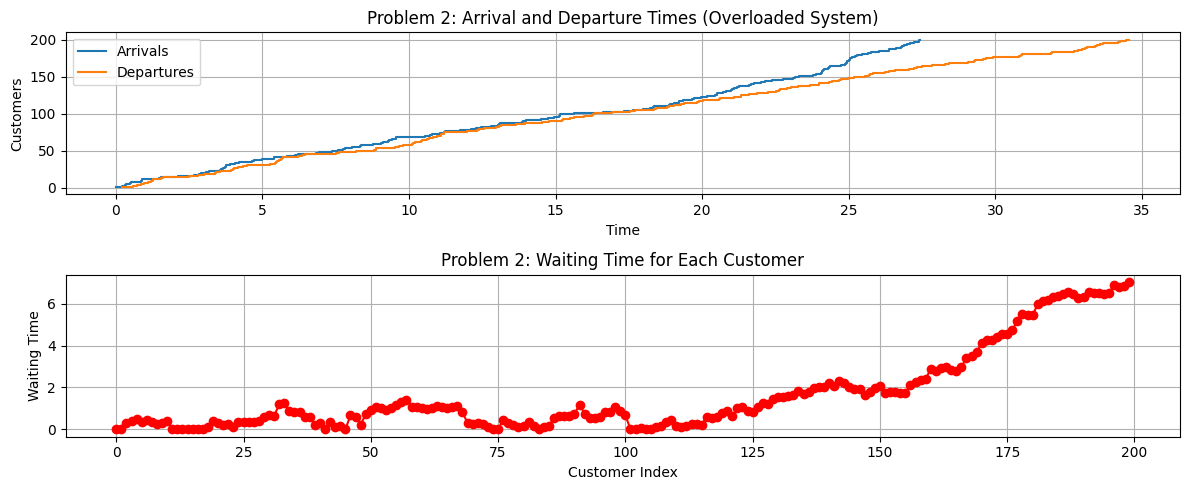

In [13]:
lambda_rate = 8
mu_rate = 6
n_customers = 200

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 2:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 2: Arrival and Departure Times (Overloaded System)')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'ro-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 2: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

Problem 3:
Total Customers: 200
Accepted Customers: 191
Rejected Customers: 9
Server Utilization: 70.74%
Average Waiting Time: 2.88 units
Average Queue Length: 0.95 customers


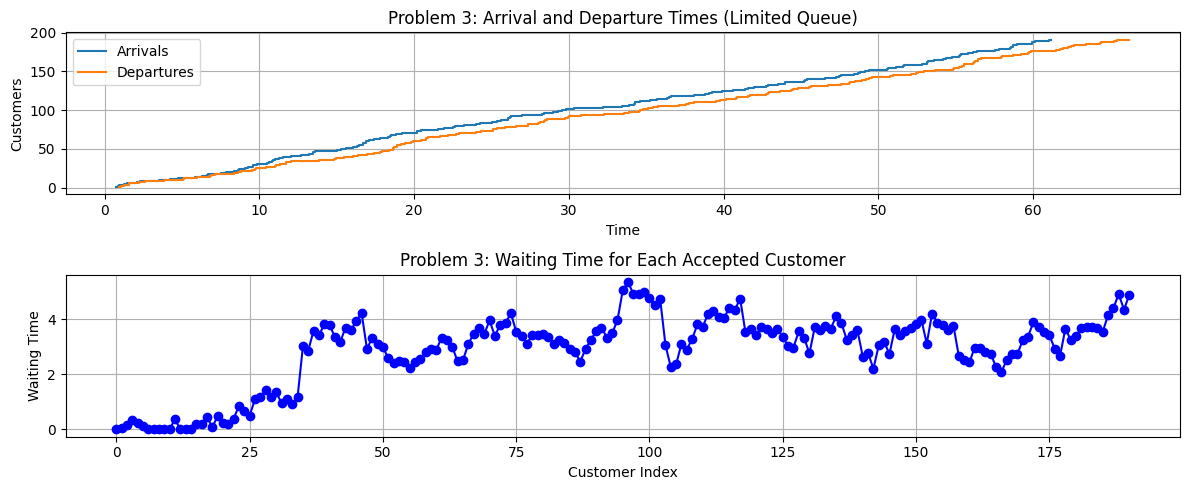

In [15]:
lambda_rate = 3
mu_rate = 4
n_customers = 200
queue_capacity = 10

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = []
end_times = []
queue = []
rejected_customers = 0
server_available_time = 0

for i in range(n_customers):
    arrival = arrival_times[i]
    service = service_times[i]

    queue = [end for end in queue if end > arrival]

    if len(queue) < queue_capacity:
        start_time = max(arrival, server_available_time)
        end_time = start_time + service
        server_available_time = end_time
        queue.append(end_time)
        start_times.append(start_time)
        end_times.append(end_time)
    else:
        rejected_customers += 1

waiting_times = np.array(start_times) - arrival_times[:len(start_times)]
server_utilization = np.sum(service_times[:len(end_times)]) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 3:")
print(f"Total Customers: {n_customers}")
print(f"Accepted Customers: {len(end_times)}")
print(f"Rejected Customers: {rejected_customers}")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times[:len(end_times)], np.arange(1, len(end_times)+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, len(end_times)+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 3: Arrival and Departure Times (Limited Queue)')

plt.subplot(2,1,2)
plt.plot(range(len(end_times)), waiting_times, 'bo-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 3: Waiting Time for Each Accepted Customer')
plt.tight_layout()
plt.show()